In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

import seaborn as sns
sns.set()

from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold


In [2]:
cust_seg_df = pd.read_csv("cust_seg.csv")
cust_seg_df = cust_seg_df.copy()
cust_seg_df.head()

C:\Users\melis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,...,0,0,0,0,0,0,0,0.0,0.0,0
1,1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
3,3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
4,4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0


In [3]:
cust_seg_df.shape

(1000000, 48)

In [4]:
cust_seg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 48 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1000000 non-null  int64  
 1   fecha_dato             1000000 non-null  object 
 2   ncodpers               1000000 non-null  int64  
 3   ind_empleado           989218 non-null   object 
 4   pais_residencia        989218 non-null   object 
 5   sexo                   989214 non-null   object 
 6   age                    1000000 non-null  object 
 7   fecha_alta             989218 non-null   object 
 8   ind_nuevo              989218 non-null   float64
 9   antiguedad             1000000 non-null  object 
 10  indrel                 989218 non-null   float64
 11  ult_fec_cli_1t         1101 non-null     object 
 12  indrel_1mes            989218 non-null   float64
 13  tiprel_1mes            989218 non-null   object 
 14  indresi            

In [5]:
cust_seg_df.rename(columns = {"ind_recibo_ult1" : "direct_debit",
                              "ind_nom_pens_ult1" : "pensions",
                              "ind_nomina_ult1" : "payroll",
                              "ind_viv_fin_ult1" : "home_account",
                              "ind_valo_fin_ult1" : "securities",
                              "ind_tjcr_fin_ult1" : "credit_card",
                              "ind_reca_fin_ult1" : "taxes",
                              "ind_pres_fin_ult1" : "loans",
                              "ind_plan_fin_ult1" : "pensions_last",
                              "ind_hip_fin_ult1" : "mortgage",
                              "ind_fond_fin_ult1" : "funds",
                              "ind_ecue_fin_ult1" : "e-account",
                              "ind_dela_fin_ult1" : "long_term_deposits",
                              "ind_deme_fin_ult1" : "medium_term_deposits",
                              "ind_deco_fin_ult1" : "short_term_deposits",
                              "ind_ctpp_fin_ult1" : "particular_plus_account",
                              "ind_ctop_fin_ult1" : "particular_account",
                              "ind_ctma_fin_ult1" : "mas_particular_account",
                              "ind_ctju_fin_ult1" : "junior_account",
                              "ind_cno_fin_ult1" : "payroll_account",
                              "ind_cder_fin_ult1": "derivative_account",
                              "ind_cco_fin_ult1" : "current_account",
                              "ind_aval_fin_ult1" : "guarantees",
                              "ind_ahor_fin_ult1" : "saving_account",
                              "renta": "gross_income_of_the_household",
                              "ind_actividad_cliente" : "activity_index",
                              "nomprov" : "province_name",
                              "cod_prov" : "province_code",
                              "tipodom" : "address_type",
                              "indfall" : "deceased_index_(N/S)",
                              "canal_entrada" : "type_of_channel",
                              "conyuemp" : "spouse_index",
                              "indext" : "foreign_index",
                              "indresi" : "residence_index",
                              "tiprel_1mes" : "customer_relation_type_at_the_beginning_of_the_month",
                              "indrel_1mes" :"customer_type_at_the_beginning_of_the_month",
                              "ult_fec_cli_1t" : "last_date_as_primary_customer",
                              "indrel" : "first/primary_customer",
                              "antiguedad" : "customer_seniority",
                              "ind_nuevo" : "new_customer_index",
                              "fecha_alta" : "customer_date_of_entry_into_the_bank",
                              "sexo" : "customer_gender",
                              "pais_residencia" : "customer_country_residence",
                              "ind_empleado" : "employee_index",
                              "ncodpers" : "customer_id",
                              "fecha_dato" : "date"}, inplace = True)
cust_seg_df.head()

,Unnamed: 0,date,customer_id,employee_index,customer_country_residence,customer_gender,age,customer_date_of_entry_into_the_bank,new_customer_index,customer_seniority,...,mortgage,pensions_last,loans,taxes,credit_card,securities,home_account,payroll,pensions,direct_debit
0,0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,...,0,0,0,0,0,0,0,0.0,0.0,0
1,1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
3,3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
4,4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0


In [6]:
cust_seg_df = cust_seg_df.drop("Unnamed: 0", axis=1)
cust_seg_df.head()

,date,customer_id,employee_index,customer_country_residence,customer_gender,age,customer_date_of_entry_into_the_bank,new_customer_index,customer_seniority,first/primary_customer,...,mortgage,pensions_last,loans,taxes,credit_card,securities,home_account,payroll,pensions,direct_debit
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [7]:
cust_seg_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 47 columns):
 #   Column                                                Non-Null Count    Dtype  
---  ------                                                --------------    -----  
 0   date                                                  1000000 non-null  object 
 1   customer_id                                           1000000 non-null  int64  
 2   employee_index                                        989218 non-null   object 
 3   customer_country_residence                            989218 non-null   object 
 4   customer_gender                                       989214 non-null   object 
 5   age                                                   1000000 non-null  object 
 6   customer_date_of_entry_into_the_bank                  989218 non-null   object 
 7   new_customer_index                                    989218 non-null   float64
 8   customer_seniority               

In [8]:
cust_seg_df.columns

Index(['date', 'customer_id', 'employee_index', 'customer_country_residence',
       'customer_gender', 'age', 'customer_date_of_entry_into_the_bank',
       'new_customer_index', 'customer_seniority', 'first/primary_customer',
       'last_date_as_primary_customer',
       'customer_type_at_the_beginning_of_the_month',
       'customer_relation_type_at_the_beginning_of_the_month',
       'residence_index', 'foreign_index', 'spouse_index', 'type_of_channel',
       'deceased_index_(N/S)', 'address_type', 'province_code',
       'province_name', 'activity_index', 'gross_income_of_the_household',
       'saving_account', 'guarantees', 'current_account', 'derivative_account',
       'payroll_account', 'junior_account', 'mas_particular_account',
       'particular_account', 'particular_plus_account', 'short_term_deposits',
       'medium_term_deposits', 'long_term_deposits', 'e-account', 'funds',
       'mortgage', 'pensions_last', 'loans', 'taxes', 'credit_card',
       'securities', 'hom

In [9]:
cust_seg_df.index

RangeIndex(start=0, stop=1000000, step=1)

In [10]:
cust_seg_df.values

array([['2015-01-28', 1375586, 'N', ..., 0.0, 0.0, 0],
       ['2015-01-28', 1050611, 'N', ..., 0.0, 0.0, 0],
       ['2015-01-28', 1050612, 'N', ..., 0.0, 0.0, 0],
       ...,
       ['2015-02-28', 1183294, 'N', ..., 0.0, 0.0, 1],
       ['2015-02-28', 1183293, 'N', ..., 0.0, 0.0, 1],
       ['2015-02-28', 1183289, 'N', ..., 0.0, 0.0, 1]], dtype=object)

In [11]:
cust_seg_df.isna().sum()

date                                                         0
customer_id                                                  0
employee_index                                           10782
customer_country_residence                               10782
customer_gender                                          10786
age                                                          0
customer_date_of_entry_into_the_bank                     10782
new_customer_index                                       10782
customer_seniority                                           0
first/primary_customer                                   10782
last_date_as_primary_customer                           998899
customer_type_at_the_beginning_of_the_month              10782
customer_relation_type_at_the_beginning_of_the_month     10782
residence_index                                          10782
foreign_index                                            10782
spouse_index                                           

last_date_as_primary_customer - 99.8899 

spouse_index -  99.9822 

These columns have been deleted because there were too many missing value.

In [12]:
cust_seg_df1 = cust_seg_df.drop(["last_date_as_primary_customer", "spouse_index"], axis=1)

In [13]:
cust_seg_df1.head()

,date,customer_id,employee_index,customer_country_residence,customer_gender,age,customer_date_of_entry_into_the_bank,new_customer_index,customer_seniority,first/primary_customer,...,mortgage,pensions_last,loans,taxes,credit_card,securities,home_account,payroll,pensions,direct_debit
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [14]:
cust_seg_df1["customer_id"].value_counts().sort_index()

15889      2
15890      2
15892      2
15893      2
15894      2
          ..
1379101    1
1379126    1
1379127    1
1379128    1
1379131    1
Name: customer_id, Length: 626159, dtype: int64

In [15]:
cust_seg_df1.drop_duplicates(subset = "customer_id", keep = 'first',  inplace = True)
print(cust_seg_df1)

              date  customer_id employee_index customer_country_residence  \
0       2015-01-28      1375586              N                         ES   
1       2015-01-28      1050611              N                         ES   
2       2015-01-28      1050612              N                         ES   
3       2015-01-28      1050613              N                         ES   
4       2015-01-28      1050614              N                         ES   
...            ...          ...            ...                        ...   
995329  2015-02-28      1149912            NaN                        NaN   
995352  2015-02-28      1150060              N                         ES   
995403  2015-02-28      1149999              N                         ES   
996937  2015-02-28      1150908              N                         ES   
999991  2015-02-28      1183305              N                         ES   

       customer_gender  age customer_date_of_entry_into_the_bank  \
0      

Duplicate customer codes have been destroyed.

In [16]:
missing_values_count = cust_seg_df1.isnull().sum()
#Let's see how many missing data we have in total.
total_cells = np.product(cust_seg_df1.shape)
total_missing = missing_values_count.sum()
#Let's see how much the missing data is as a percentage (%)
(total_missing/total_cells) * 100

0.8415789315848247

In [17]:
df = cust_seg_df1.copy()

In [18]:
df["age"]   = pd.to_numeric(df["age"], errors="coerce") 
df["customer_seniority"]   = pd.to_numeric(df["customer_seniority"], errors="coerce") 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626159 entries, 0 to 999991
Data columns (total 45 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   date                                                  626159 non-null  object 
 1   customer_id                                           626159 non-null  int64  
 2   employee_index                                        619174 non-null  object 
 3   customer_country_residence                            619174 non-null  object 
 4   customer_gender                                       619172 non-null  object 
 5   age                                                   619174 non-null  float64
 6   customer_date_of_entry_into_the_bank                  619174 non-null  object 
 7   new_customer_index                                    619174 non-null  float64
 8   customer_seniority                          

In [20]:
print("Unique values in each categorical column:")
for col in df.select_dtypes(include=[object]):
    print(col,":", df[col].unique())

Unique values in each categorical column:
date : ['2015-01-28' '2015-02-28']
employee_index : ['N' nan 'A' 'B' 'F' 'S']
customer_country_residence : ['ES' nan 'CA' 'CH' 'CL' 'IE' 'AT' 'NL' 'FR' 'GB' 'DE' 'DO' 'BE' 'AR' 'VE'
 'US' 'MX' 'BR' 'IT' 'EC' 'PE' 'CO' 'HN' 'FI' 'SE' 'AL' 'PT' 'MZ' 'CN'
 'TW' 'PL' 'IN' 'CR' 'NI' 'HK' 'AD' 'CZ' 'AE' 'MA' 'GR' 'PR' 'RO' 'IL'
 'RU' 'GT' 'GA' 'NO' 'SN' 'MR' 'UA' 'BG' 'PY' 'EE' 'SV' 'ET' 'CM' 'SA'
 'CI' 'QA' 'LU' 'PA' 'BA' 'BO' 'AU' 'BY' 'KE' 'SG' 'HR' 'MD' 'SK' 'TR'
 'AO' 'CU' 'GQ' 'EG' 'ZA' 'DK' 'UY' 'GE' 'TH' 'DZ' 'LB' 'JP' 'NG' 'PK'
 'TN' 'TG' 'KR' 'GH' 'RS' 'VN' 'PH' 'KW' 'NZ' 'MM' 'KH' 'GI' 'SL' 'GN'
 'GW' 'OM' 'CG' 'LV' 'LT' 'ML' 'MK' 'HU' 'IS' 'LY' 'CF' 'GM' 'KZ' 'CD'
 'BZ']
customer_gender : ['H' 'V' nan]
customer_date_of_entry_into_the_bank : ['2015-01-12' '2012-08-10' nan ... '2015-01-31' '2015-02-17' '2015-02-01']
customer_relation_type_at_the_beginning_of_the_month : ['A' 'I' nan 'P']
residence_index : ['S' nan 'N']
foreign_index : ['N' 

In [21]:
df["customer_country_residence"].value_counts()

ES    615491
FR       288
AR       276
DE       257
GB       254
       ...  
BZ         1
TG         1
GI         1
KW         1
CD         1
Name: customer_country_residence, Length: 113, dtype: int64

Starting from this part, I will be focusing on ES data only (which has the most records). 

In [22]:
df_es = df.query("customer_country_residence =='ES'").reset_index(drop=True)

In [23]:
df_es.isnull().sum()

date                                                         0
customer_id                                                  0
employee_index                                               0
customer_country_residence                                   0
customer_gender                                              1
age                                                          0
customer_date_of_entry_into_the_bank                         0
new_customer_index                                           0
customer_seniority                                           0
first/primary_customer                                       0
customer_type_at_the_beginning_of_the_month                  0
customer_relation_type_at_the_beginning_of_the_month         0
residence_index                                              0
foreign_index                                                0
type_of_channel                                             51
deceased_index_(N/S)                                   

In [24]:
print("Unique values in each categorical column:")
for col in df_es.select_dtypes(include=[float]):
    print(col,":", df_es[col].unique())

Unique values in each categorical column:
age : [ 35.  23.  22.  24.  65.  28.  25.  26.  53.  27.  32.  37.  31.  39.
  63.  33.  55.  42.  58.  38.  50.  30.  45.  44.  36.  29.  60.  57.
  67.  47.  34.  48.  46.  54.  84.  15.  12.   8.   6.  83.  40.  77.
  69.  52.  59.  43.  10.   9.  49.  41.  51.  78.  16.  11.  73.  62.
  66.  17.  68.  82.  95.  96.  56.  61.  79.  72.  14.  19.  13.  86.
  64.  20.  89.  71.   7.  70.  74.  21.  18.  75.   4.  80.  81.   5.
  76.  92.  93.  85.  91.  87.  90.  94.  99.  98.  88.  97. 100. 101.
 106. 103.   3.   2. 102. 104. 111. 107. 109. 105. 112. 115. 110. 116.
 108. 113.]
new_customer_index : [0. 1.]
customer_seniority : [ 6.00000e+00  3.50000e+01  3.40000e+01  3.30000e+01  3.10000e+01
  2.10000e+01  1.60000e+01  2.70000e+01  9.00000e+00  2.20000e+01
  1.30000e+01  2.90000e+01  8.00000e+00  1.10000e+01  1.00000e+01
  2.80000e+01  2.40000e+01  7.00000e+00  2.50000e+01  1.40000e+01
  2.60000e+01  1.20000e+01  2.30000e+01  1.00000e+00  1.80

"customer_seniority" column has a value below zero. I will replace this value with 0.

In [25]:
df_es.loc[df_es.customer_seniority < 0, "customer_seniority"] = 0

In [26]:
df_es["age"].value_counts().sort_index()

2.0        9
3.0       59
4.0      107
5.0      160
6.0      177
        ... 
111.0      8
112.0      8
113.0      4
115.0      6
116.0      2
Name: age, Length: 114, dtype: int64

Santander opens junior account between the ages of 13 and 17. Therefore customer under the age of 13 should be considered invalid.

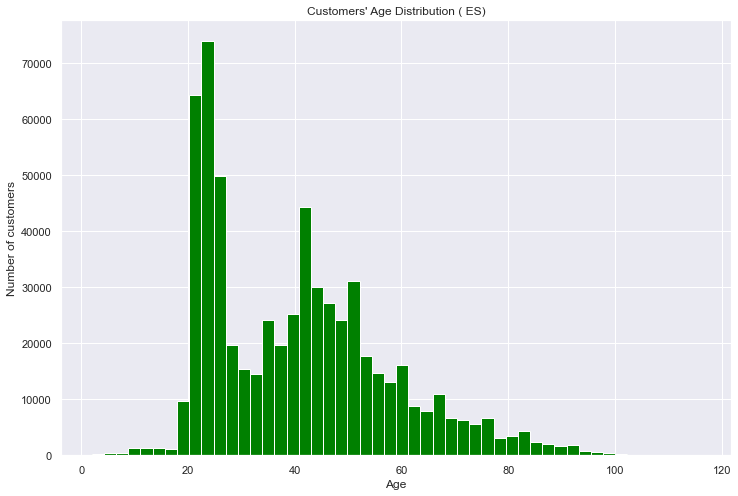

In [27]:
plt.figure(figsize=(12,8))
df_es['age'].hist(bins=50, color="green");
plt.title("Customers' Age Distribution ( ES)")
plt.xlabel("Age")
plt.ylabel("Number of customers"); 

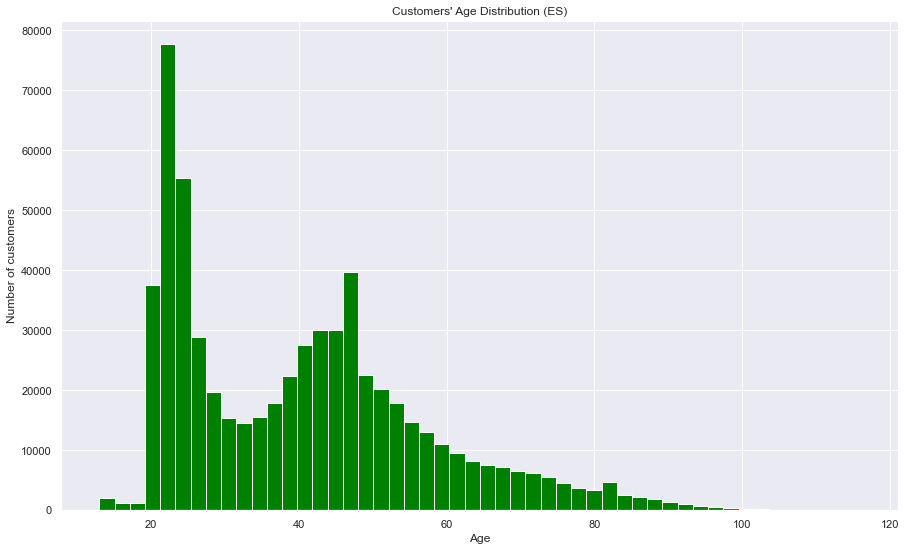

In [28]:
df_es.loc[df_es.age < 13,"age"]  = df_es.loc[(df_es.age >= 13) & (df_es.age <= 30),"age"].mean(skipna=True)
df_es.loc[df_es.age > 116,"age"] = df_es.loc[(df_es.age >= 30) & (df_es.age <= 116),"age"].mean(skipna=True)
df_es["age"].fillna(df_es["age"].mean(),inplace=True)
df_es["age"] = df_es["age"].astype(int)
plt.figure(figsize=(15,9))
df_es['age'].hist(bins=50, color="green");
plt.title("Customers' Age Distribution (ES)")
plt.xlabel("Age")
plt.ylabel("Number of customers"); 

In [29]:
pip install missingno

<AxesSubplot:>

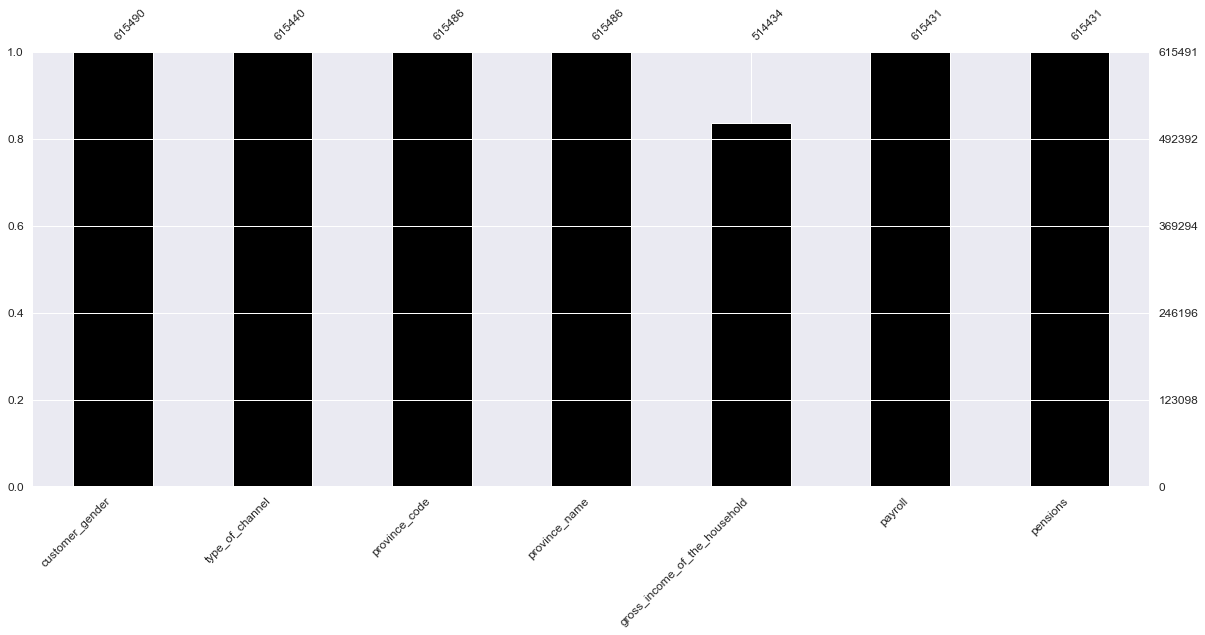

In [30]:
import missingno as msno
missingValuesColumns= df_es.columns[df_es.isnull().any()].tolist()
msno.bar(df_es[missingValuesColumns],\
            figsize=(20,8),color="black",fontsize=12,labels=True,)

I will try to fill this place (gross_income_of_the_household) in different ways as there are too many missing values.


## First Method

In [31]:
df_es1 = df_es.copy()

In [32]:
df_es1 = df_es1.dropna(axis = 0, how="any")

In [33]:
df_es1.isnull().sum()

date                                                    0
customer_id                                             0
employee_index                                          0
customer_country_residence                              0
customer_gender                                         0
age                                                     0
customer_date_of_entry_into_the_bank                    0
new_customer_index                                      0
customer_seniority                                      0
first/primary_customer                                  0
customer_type_at_the_beginning_of_the_month             0
customer_relation_type_at_the_beginning_of_the_month    0
residence_index                                         0
foreign_index                                           0
type_of_channel                                         0
deceased_index_(N/S)                                    0
address_type                                            0
province_code 

In [34]:
df_es1.shape

(514353, 45)

In [35]:
print("Old data frame length:", len(df_es))
print("New data frame length:", len(df_es1)) 
print("Number of rows with at least 1 NA value: ", (len(df_es)-len(df_es1)))

Old data frame length: 615491
New data frame length: 514353
Number of rows with at least 1 NA value:  101138


This is very simple but bad method.

## Second Method

In [36]:
df_es2 = df_es.copy()

In [37]:
median = df_es2["gross_income_of_the_household"].median()
df_es2["gross_income_of_the_household"].fillna(median, inplace=True)

In [38]:
df_es2 = df_es2.dropna(axis = 0, how="any")

In [39]:
df_es2.shape

(615387, 45)

In [40]:
df_es2.isnull().sum()

date                                                    0
customer_id                                             0
employee_index                                          0
customer_country_residence                              0
customer_gender                                         0
age                                                     0
customer_date_of_entry_into_the_bank                    0
new_customer_index                                      0
customer_seniority                                      0
first/primary_customer                                  0
customer_type_at_the_beginning_of_the_month             0
customer_relation_type_at_the_beginning_of_the_month    0
residence_index                                         0
foreign_index                                           0
type_of_channel                                         0
deceased_index_(N/S)                                    0
address_type                                            0
province_code 

In [41]:
print("Old data frame length:", len(cust_seg_df))
print("New data frame length:", len(df_es2)) 
print("Number of rows with at least 1 NA value: ", (len(cust_seg_df)-len(df_es2)))

Old data frame length: 1000000
New data frame length: 615387
Number of rows with at least 1 NA value:  384613


From 1 million observations, almost 385K have been dropped. Through the techniques Melisa has employed, around 61.5% of data has been maintained.

## Third Method

#### KNN and Random Forest

In [93]:
df_es3 = df_es.copy()

In [46]:
!pip install ycimpute

In [96]:
from sklearn.impute import KNNImputer
from numpy import isnan

## Forth Method

In [267]:
df_es4 = df_es.copy()

In [268]:
df_es4.interpolate(method = "linear", inplace=True)

In [269]:
df_es4 = df_es4.dropna(axis = 0, how="any")

In [270]:
df_es4.isnull().sum()

date                                                    0
customer_id                                             0
employee_index                                          0
customer_country_residence                              0
customer_gender                                         0
age                                                     0
customer_date_of_entry_into_the_bank                    0
new_customer_index                                      0
customer_seniority                                      0
first/primary_customer                                  0
customer_type_at_the_beginning_of_the_month             0
customer_relation_type_at_the_beginning_of_the_month    0
residence_index                                         0
foreign_index                                           0
type_of_channel                                         0
deceased_index_(N/S)                                    0
address_type                                            0
province_code 

In [271]:
print("Old data frame length:", len(cust_seg_df))
print("New data frame length:", len(df_es4)) 
print("Number of rows with at least 1 NA value: ", (len(cust_seg_df)-len(df_es4)))

Old data frame length: 1000000
New data frame length: 615434
Number of rows with at least 1 NA value:  384566


# EDA

In [160]:
print(df_es['type_of_channel'].value_counts())
print()

KHE    212526
KAT    165127
KFC    147195
KFA     20881
KHD      5866
        ...  
KDI         1
KCT         1
KGN         1
KDB         1
KGU         1
Name: type_of_channel, Length: 156, dtype: int64



In [235]:
print(df_es['employee_index'].value_counts())
print()

N    615013
B       193
A       143
F       141
S         1
Name: employee_index, dtype: int64

